In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
legislator_embeddings = np.load('output/legislator_embeddings.npy')

members = pd.read_csv('data/H117_members.csv')
members['icpsr'] = members['icpsr'].astype(int)
member_lookup = pd.read_csv('data/H117_members_lookup.csv')
members = pd.merge(members, member_lookup, on='icpsr', how='inner')

print(members.shape, legislator_embeddings.shape)

(456, 23) (456, 2)


In [23]:
members = members.sort_values(by='member_id')
members[['dim1','dim2']] = legislator_embeddings

members[['dim1','dim2','nominate_dim1','nominate_dim2']].corr()

,dim1,dim2,nominate_dim1,nominate_dim2
dim1,1.000000,0.411594,-0.468727,0.332843
dim2,0.411594,1.000000,-0.968016,-0.215626
nominate_dim1,-0.468727,-0.968016,1.000000,0.107085
nominate_dim2,0.332843,-0.215626,0.107085,1.000000


In [24]:
members.loc[members['bioname']=='PELOSI, Nancy','party_code']

24    100
Name: party_code, dtype: int64

In [27]:
members['party'] = members['party_code'].map({200:'R', 100:'D'})

members.groupby('party')[['dim2','nominate_dim1']].corr()

dim2  nominate_dim1
party                                       
D     dim2           1.000000      -0.540119
      nominate_dim1 -0.540119       1.000000
R     dim2           1.000000      -0.550244
      nominate_dim1 -0.550244       1.000000

In [34]:
members.loc[members['party']=='D','dim2'].argmin()
members[members['party']=='D'].iloc[174]

congress                                         117
chamber                                        House
icpsr                                          21994
state_icpsr                                       96
district_code                                      0
state_abbrev                                      VI
party_code                                       100
occupancy                                        NaN
last_means                                       NaN
bioname                          PLASKETT, Stacey E.
bioguide_id                                  P000610
born                                            1966
died                                             NaN
nominate_dim1                                 -0.419
nominate_dim2                                  0.496
nominate_log_likelihood                     -0.91288
nominate_geo_mean_probability                0.93687
nominate_number_of_votes                        14.0
nominate_number_of_errors                     

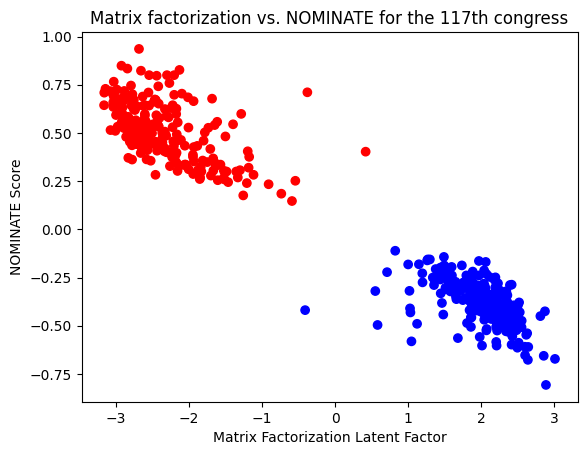

In [35]:
plt.scatter(members['dim2'], members['nominate_dim1'], c=members['party_code'].map({100:'b', 200:'r'}))
plt.xlabel('Matrix Factorization Latent Factor')
plt.ylabel('NOMINATE Score')
plt.title('Matrix factorization vs. NOMINATE for the 117th congress')
plt.savefig('output/matrix_factorization_vs_nominate.png')